# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import PolynomialFeatures

In [14]:
df=pd.read_csv('vehicles.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [16]:
df.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

A used car dealership is looking to maximize revenue and optimize pricing strategies by understanding what factors most influence the selling price of a car. The dealership wants to identify which vehicle characteristics (such as mileage, age, and other features) contribute most significantly to the car's market value. This insight will help them make better inventory, pricing, and marketing decisions.

We frame this problem as a supervised regression task, where the target variable is price. Our goal is to model how independent variables such as year (indicating vehicle age) and odometer (indicating usage) impact the price. By quantifying these relationships, we aim to uncover the key factors that drive the value of used cars. The dataset contains over 426,000 records with numeric and categorical variables that will be explored, cleaned, and modeled.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Data Understanding step, we will explore the dataset to understand its structure, the relationships between different features, and identify any potential quality issues such as missing values, outliers, or incorrect data.

In [21]:
df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

Missing values need to be addressed before proceeding with analysis, as they can affect the quality of your models and visualizations. 

In [23]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

There are many missing values Examples: IN, drive. size, type, paint_color etc.

In [25]:
#lets look at condition now
df['condition'].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

<Axes: xlabel='condition'>

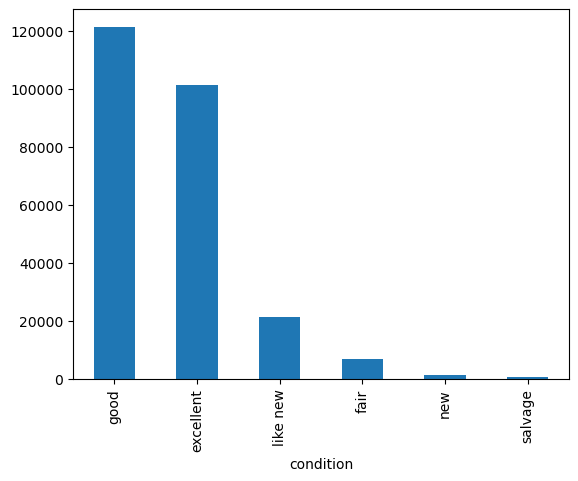

In [26]:
#bar plot condition
df['condition'].value_counts().plot(kind='bar')

Most common  is good and excellent

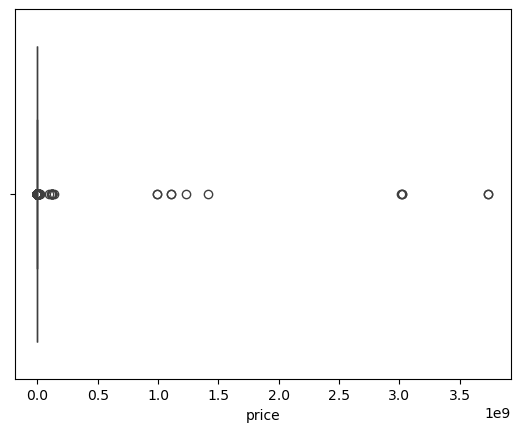

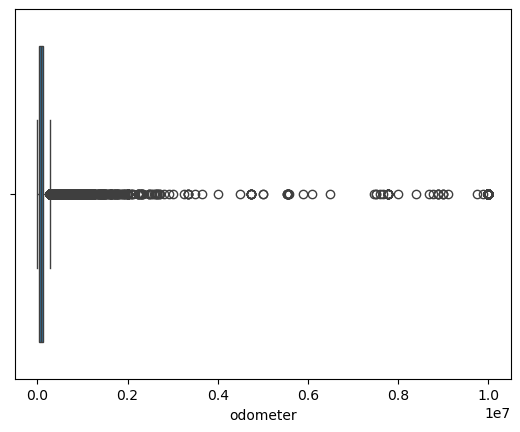

In [28]:
sns.boxplot(x=df['price'])
plt.show()
# Boxplot for odometer
sns.boxplot(x=df['odometer'])
plt.show()

In [29]:
# Check for unique values in categorical columns
df['type'].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

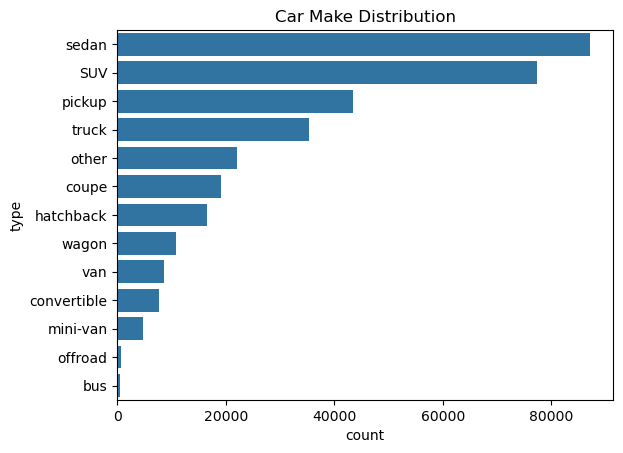

In [30]:
# Visualize the distribution of a categorical column (e.g., make)
sns.countplot(y=df['type'], order=df['type'].value_counts().index)
plt.title('Car Make Distribution')
plt.show()

Sedan and SUV is the most popular from the data in terms of distribution

In [32]:
#lets look at cylinders now
df['cylinders'].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

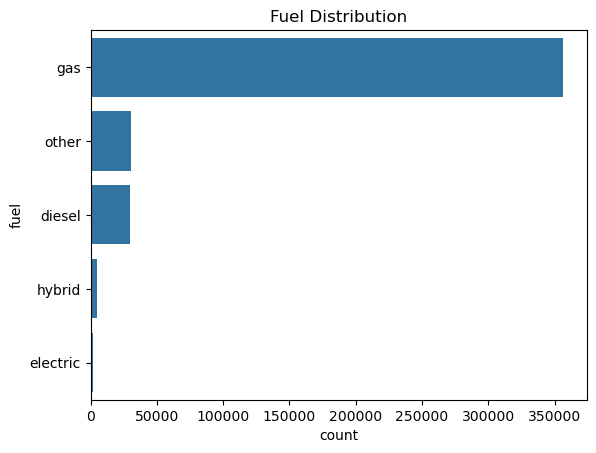

In [33]:
# Visualize the distribution of a categorical column (e.g., Fuel)
sns.countplot(y=df['fuel'], order=df['fuel'].value_counts().index)
plt.title('Fuel Distribution')
plt.show()

There is a clear majority of gas, so we can impute unknown value as 'gas'.

In [35]:
# Let's look at value counts for other columns
cols = ['price', 'year', 'manufacturer', 'model', 'odometer', 'drive', 'size', 'paint_color', 'state', 'title_status']

In [36]:
for col in cols:
    print(f"\nValue counts for: {col}")
    print(df[col].value_counts().head(10))  # show top 10 for readability


Value counts for: price
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
4500      2778
5995      2727
3500      2716
29990     2705
6500      2594
Name: count, dtype: int64

Value counts for: year
year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
2014.0    30283
2019.0    25375
2012.0    23898
2011.0    20341
2020.0    19298
Name: count, dtype: int64

Value counts for: manufacturer
manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

Value counts for: model
model
f-150             8009
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
accord            2969
wrangler          2848
civic             2799
altima            2779
escape            2746
Name: count, dtype: int64

Value counts for: odometer
od

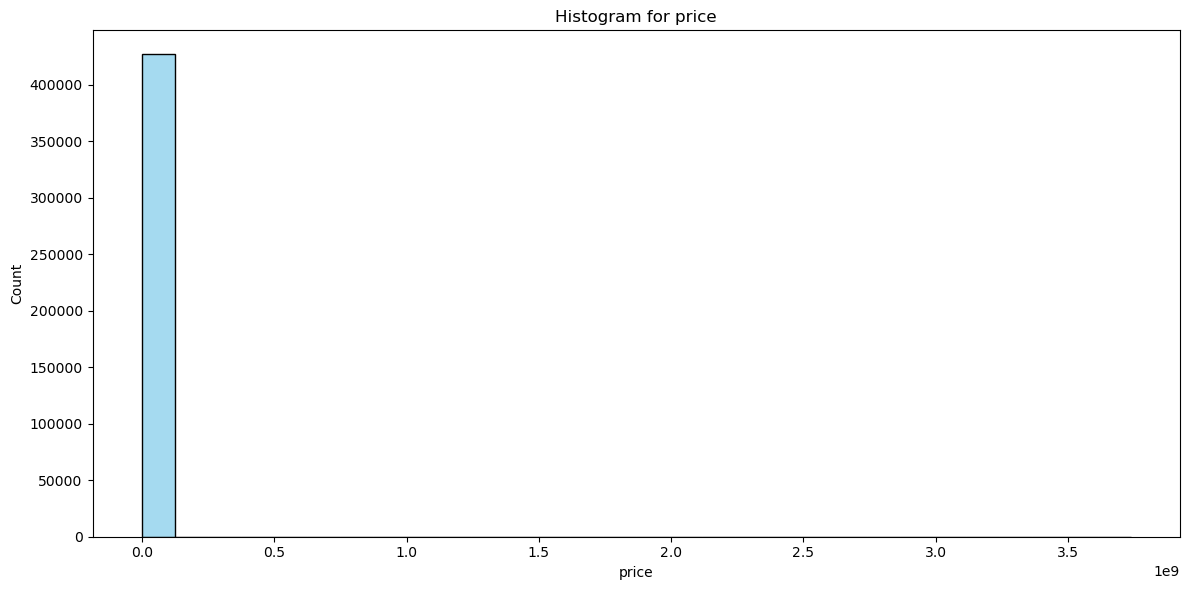

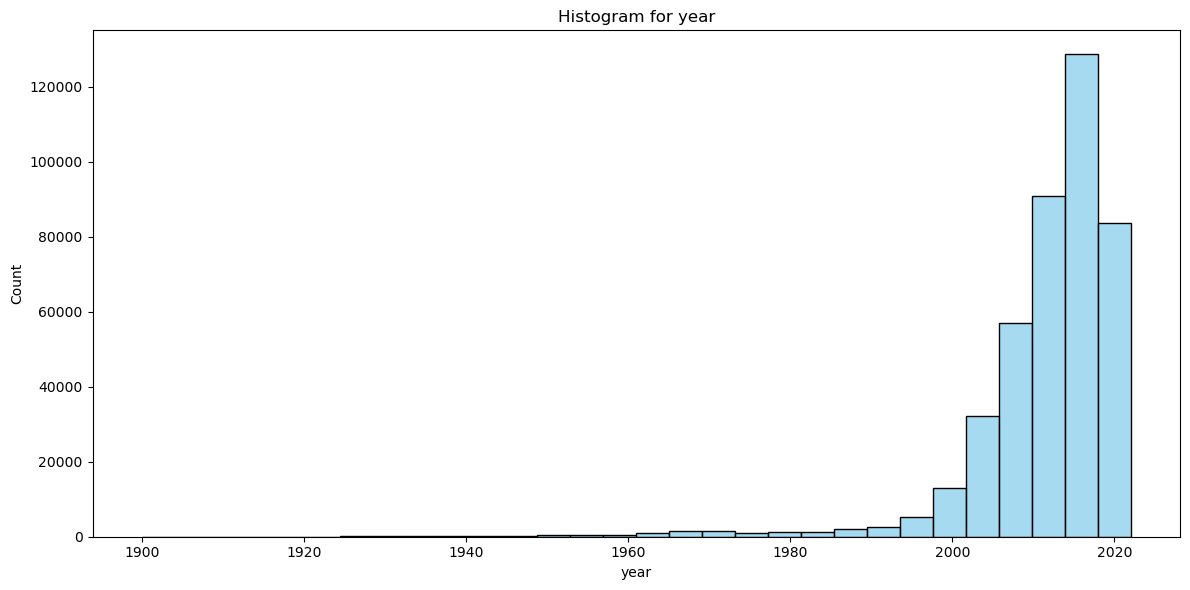

/var/folders/t1/pzg0tvcd5mq3dn6h905_ds740000gn/T/ipykernel_89206/3662877570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="crest")


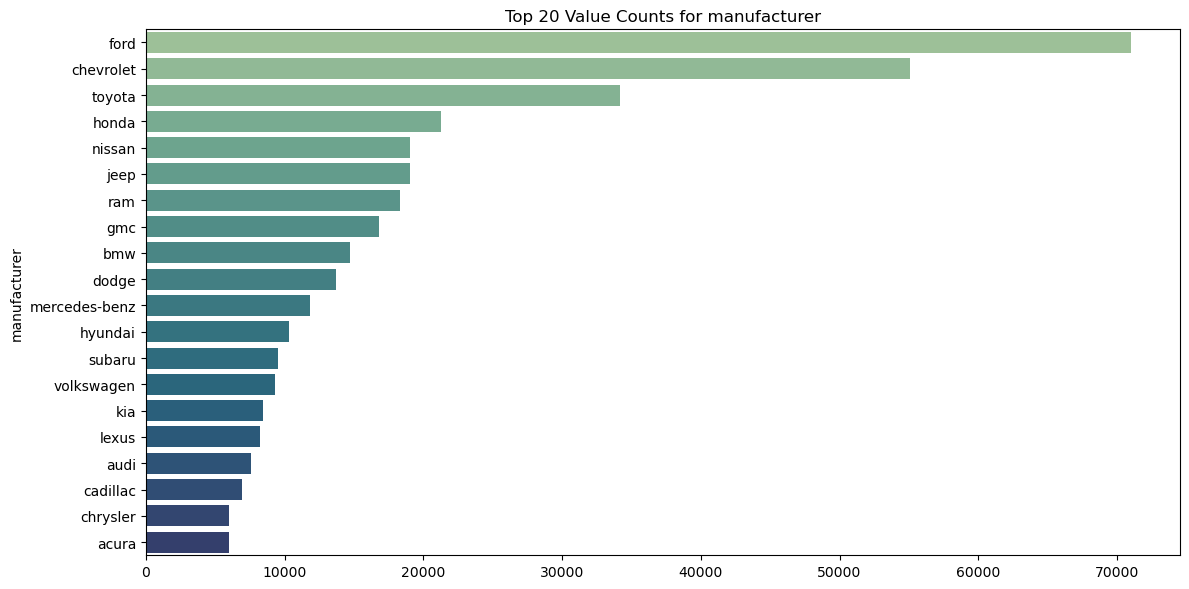

/var/folders/t1/pzg0tvcd5mq3dn6h905_ds740000gn/T/ipykernel_89206/3662877570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="crest")


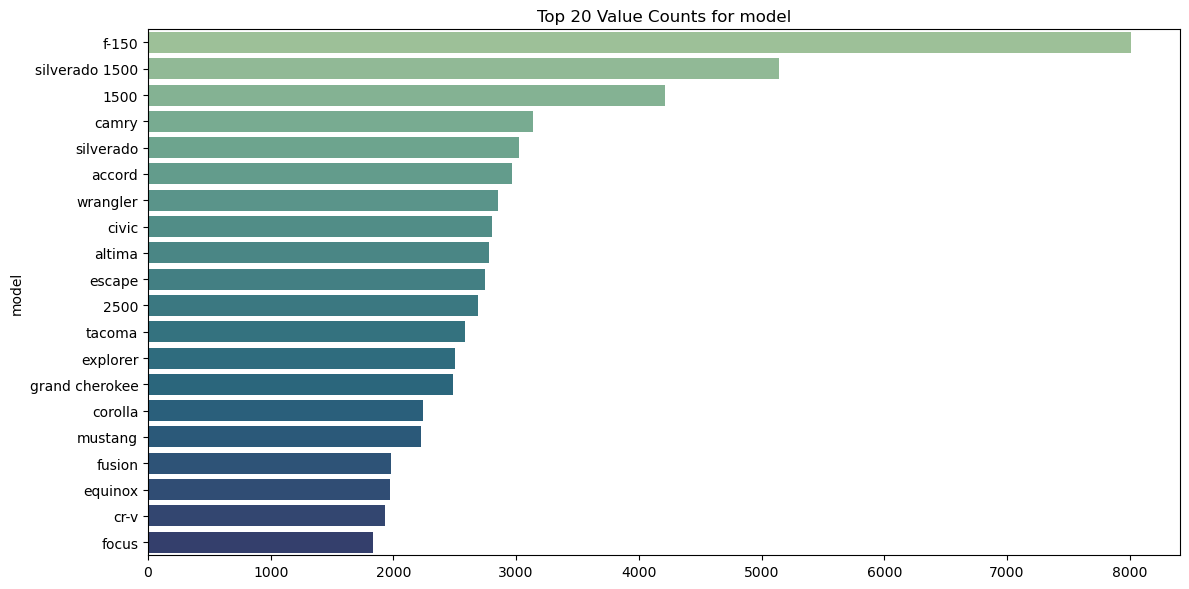

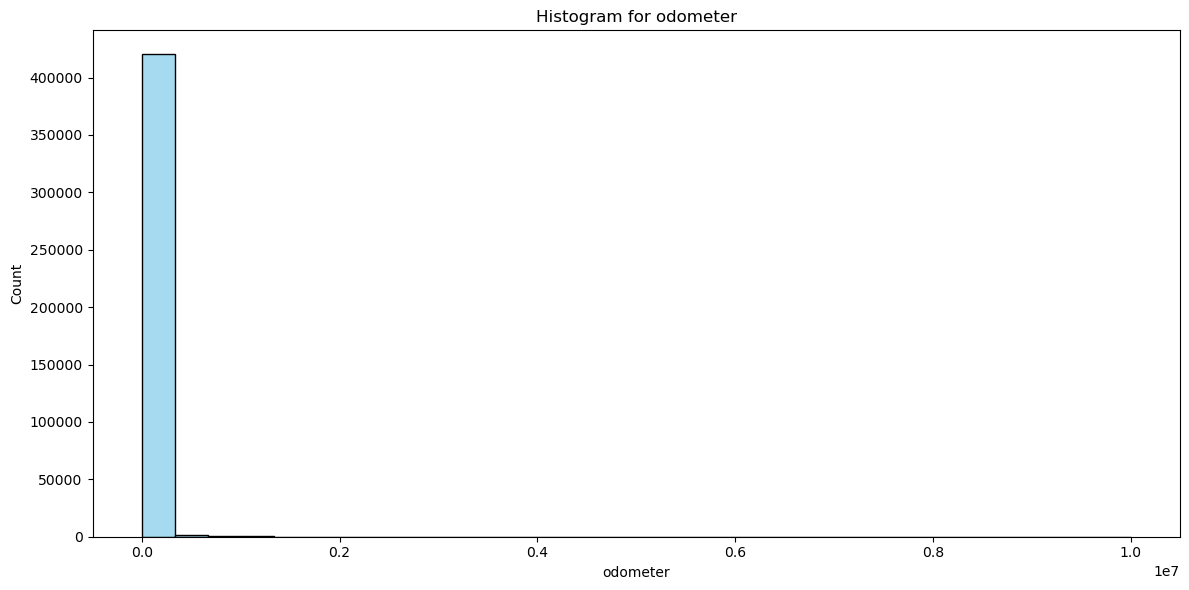

/var/folders/t1/pzg0tvcd5mq3dn6h905_ds740000gn/T/ipykernel_89206/3662877570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="crest")


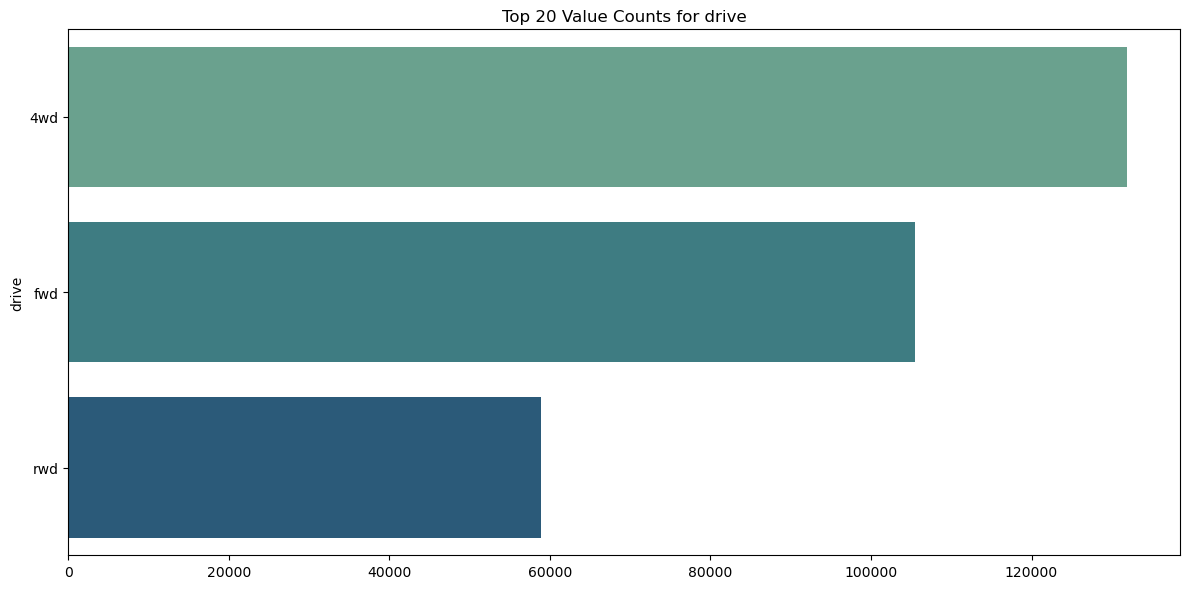

/var/folders/t1/pzg0tvcd5mq3dn6h905_ds740000gn/T/ipykernel_89206/3662877570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="crest")


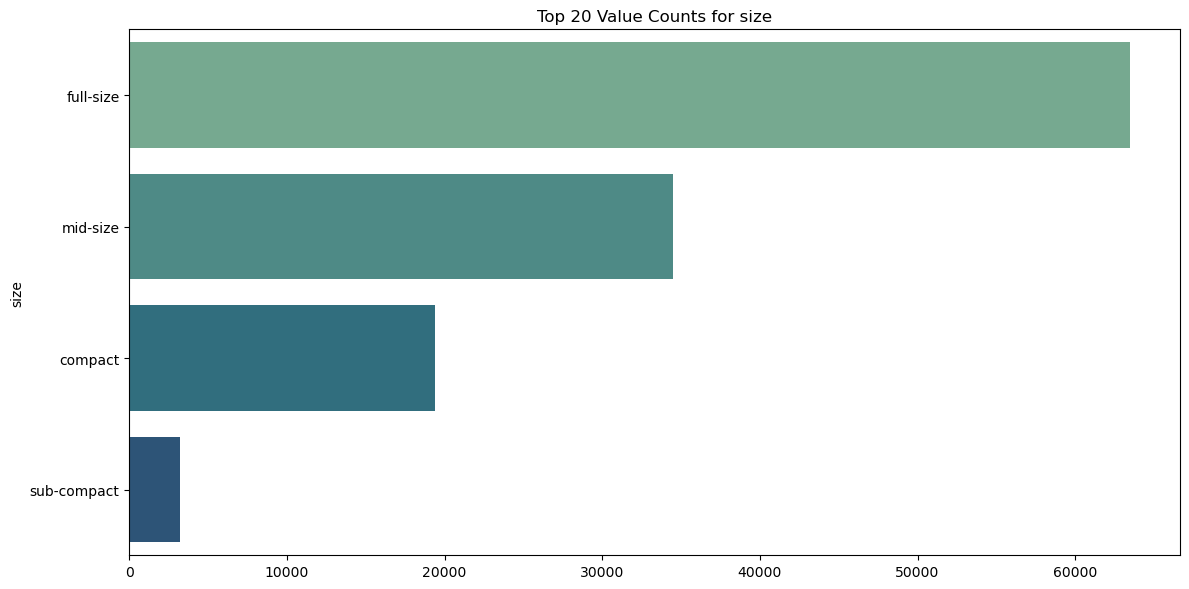

/var/folders/t1/pzg0tvcd5mq3dn6h905_ds740000gn/T/ipykernel_89206/3662877570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="crest")


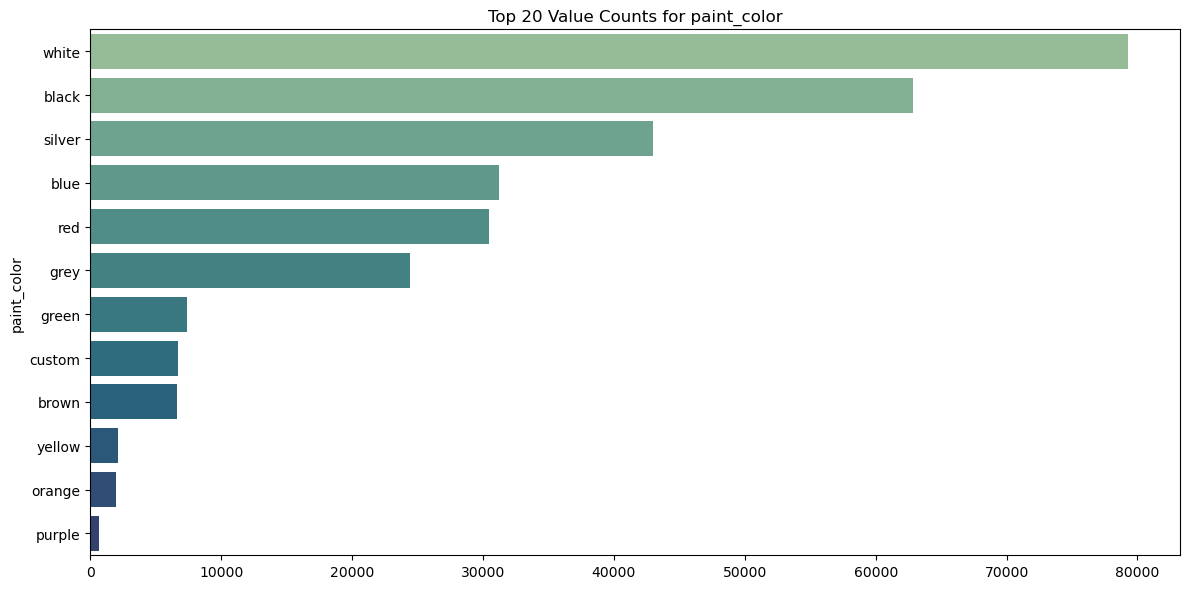

/var/folders/t1/pzg0tvcd5mq3dn6h905_ds740000gn/T/ipykernel_89206/3662877570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="crest")


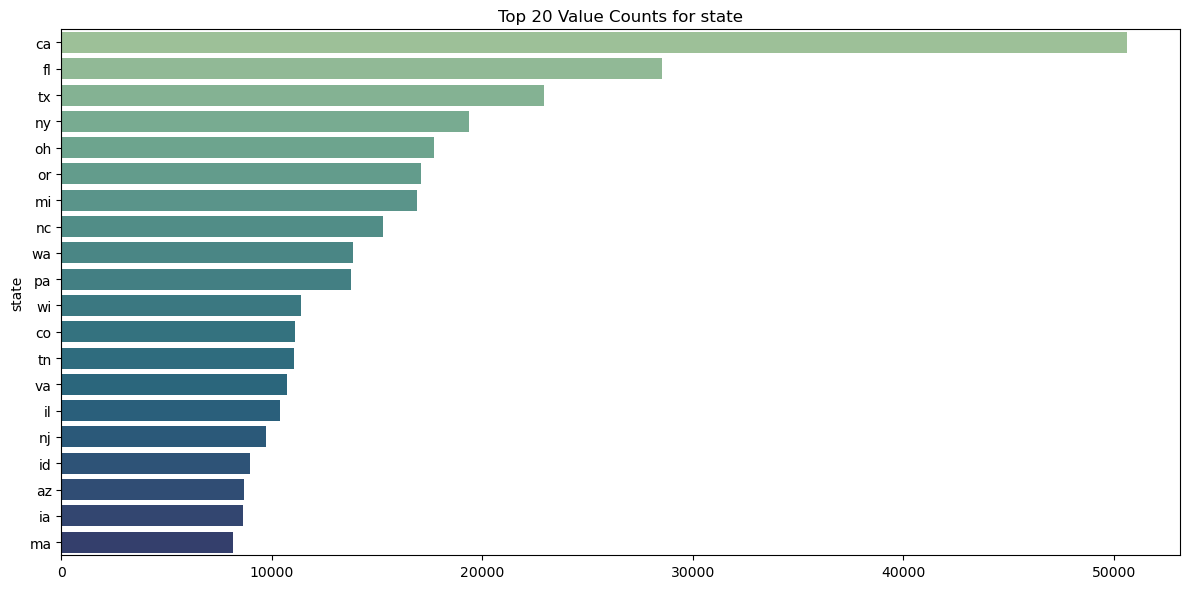

/var/folders/t1/pzg0tvcd5mq3dn6h905_ds740000gn/T/ipykernel_89206/3662877570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="crest")


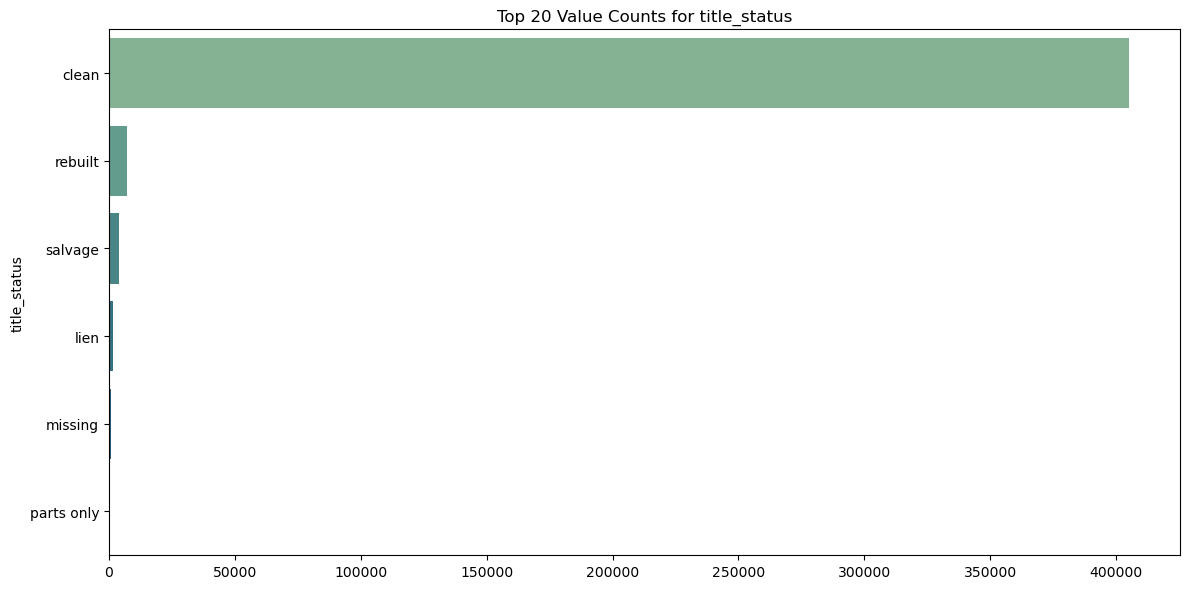

In [37]:
for col in cols:
    plt.figure(figsize=(12, 6))
    
    if df[col].dtype == 'object' or df[col].nunique() < 30:
        # For categorical columns or low cardinality
        vc = df[col].value_counts().head(20)
        sns.barplot(x=vc.values, y=vc.index, palette="crest")
        plt.title(f"Top 20 Value Counts for {col}")
    else:
        # For continuous/numeric columns like price, year, odometer
        sns.histplot(df[col].dropna(), kde=False, bins=30, color='skyblue')
        plt.title(f"Histogram for {col}")
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

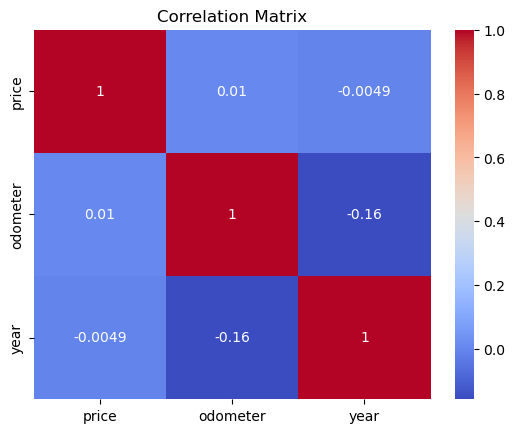

In [38]:
# Correlation matrix
num_columns = ['price', 'odometer', 'year']
corr = df[num_columns].corr()
# Plot correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

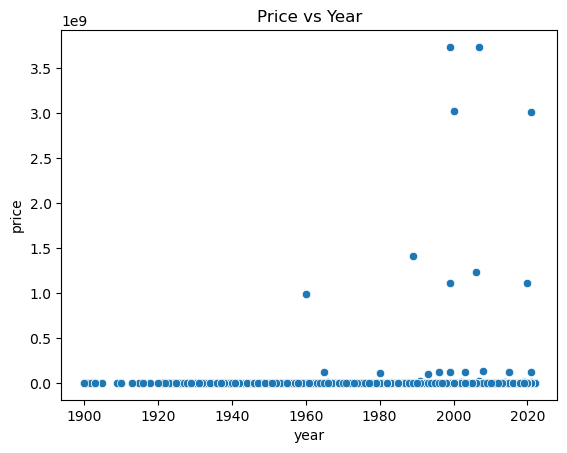

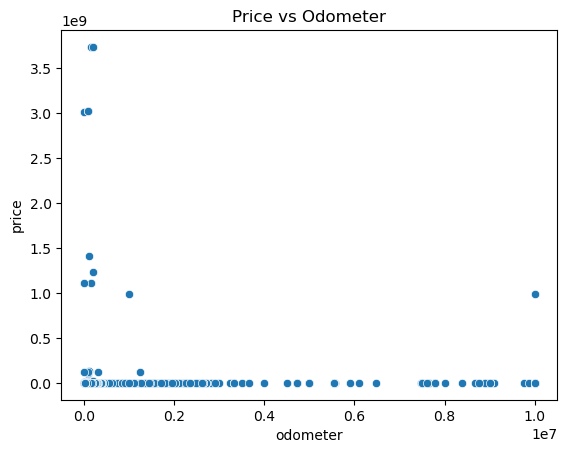

In [39]:
# Scatterplot to visualize price vs. year, price vs. odometer
sns.scatterplot(x=df['year'], y=df['price'])
plt.title('Price vs Year')
plt.show()
sns.scatterplot(x=df['odometer'], y=df['price'])
plt.title('Price vs Odometer')
plt.show()

For the first graph, the high prices are for recent years and for odometer, most of the high prices are low mileage data.

In [41]:
# Check the data types
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [42]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
#Fill missing values
df['odometer']= df['odometer'].fillna(df['odometer'].mean())

In [43]:
# to find out the cut off for the year column in our data set
df['year'].max()

2022.0

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [45]:
# Remove cars with price <= $100 or price > $100,000
df = df[(df['price'] > 100) & (df['price'] < 100000)]
# Remove unrealistic odometer values (e.g., > 1 million miles)
df = df[df['odometer'] < 1000000]

In [46]:
df = df.dropna(subset=['year', 'manufacturer', 'model', 'odometer', 'fuel', 'transmission', 'type'])

In [47]:
# Fill missing categorical with "unknown and most common values"
df['cylinders'] = df['cylinders'].fillna('6 cylinders')
df['fuel'] = df['fuel'].fillna('gas')
df['condition'] = df['condition'].fillna('good')
df['drive'] = df['drive'].fillna('4wd')
df['paint_color'] = df['paint_color'].fillna('white')
df['title_status'] = df['title_status'].fillna('clean')

In [48]:
#drop unused columns
df = df.drop(['id', 'VIN', 'region'], axis=1)

In [49]:
# Ensure year is int and not float
df['year'] = df['year'].astype(int)

In [50]:
#create new useful features based on the cut off date as there was no year cut off date provided in the original data set
# Create a vehicle age column
df['age'] = 2022 - df['year']

In [51]:
#Reset index after dropping rows
df = df.reset_index(drop=True)

In [52]:
df.head()

price  year manufacturer                     model  condition    cylinders  \
0  33590  2014          gmc  sierra 1500 crew cab slt       good  8 cylinders   
1  22590  2010    chevrolet            silverado 1500       good  8 cylinders   
2  39590  2020    chevrolet       silverado 1500 crew       good  8 cylinders   
3  30990  2017       toyota      tundra double cab sr       good  8 cylinders   
4  15000  2013         ford                 f-150 xlt  excellent  6 cylinders   

  fuel  odometer title_status transmission drive       size    type  \
0  gas   57923.0        clean        other   4wd        NaN  pickup   
1  gas   71229.0        clean        other   4wd        NaN  pickup   
2  gas   19160.0        clean        other   4wd        NaN  pickup   
3  gas   41124.0        clean        other   4wd        NaN  pickup   
4  gas  128000.0        clean    automatic   rwd  full-size   truck   

  paint_color state  age  
0       white    al    8  
1        blue    al   12  
2         red    al    2  
3         red    al    5  
4       black    al    9

Remove Outliers Using IQR Method as Most price and odometer values are crammed on the left (normal range). But there is a long tail of extreme outliers stretches to the right — values in the millions or even billions are clearly not realistic for used cars.

In [54]:
#Remove Outliers Using IQR Method as Most price and odometer values are crammed on the left (normal range). But there is a long tail of extreme outliers stretches to the right — values in the millions or even billions are clearly not realistic for used cars.
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'price')
df = remove_outliers(df, 'odometer')

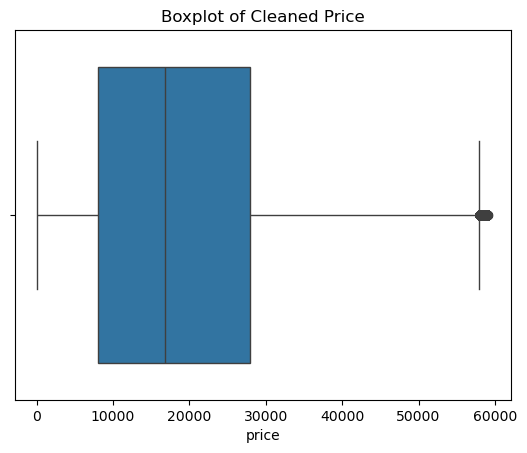

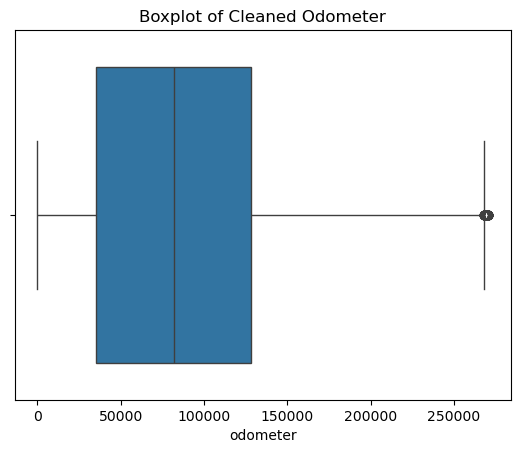

In [55]:
# Replot price boxplot
sns.boxplot(x=df['price'])
plt.title('Boxplot of Cleaned Price')
plt.show()

# Replot odometer boxplot
sns.boxplot(x=df['odometer'])
plt.title('Boxplot of Cleaned Odometer')
plt.show()

In [56]:
# Example: Apply Z-score for outlier removal on price and odometer
df['price_z'] = zscore(df['price'])
df['odometer_z'] = zscore(df['odometer'])

In [57]:
# Filter out outliers
df_cleaned = df[(np.abs(df['price_z']) < 3) & (np.abs(df['odometer_z']) < 3)]

In [58]:
# Drop z-score columns
df_cleaned = df_cleaned.drop(columns=['price_z', 'odometer_z'])

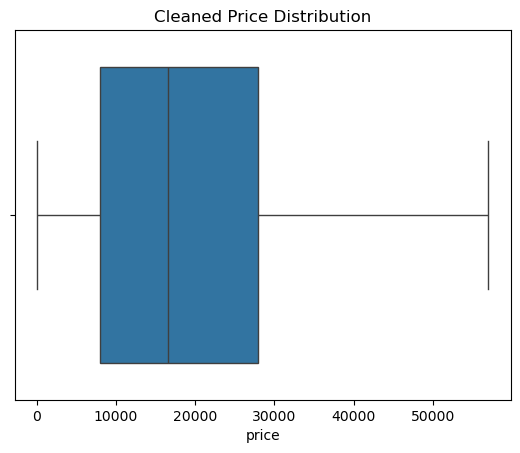

In [59]:
# Re-plot the cleaned boxplot
sns.boxplot(x=df_cleaned['price'])
plt.title("Cleaned Price Distribution")
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [62]:
# Define target and features
X = df_cleaned.drop(columns=['price'])
y = df_cleaned ['price']

In [63]:
# Separate columns and define feature types
numerical_features = ['odometer', 'age']
categorical_features = ['manufacturer', 'model', 'fuel', 'title_status', 'state', 'size',
                        'transmission', 'drive', 'type', 'paint_color', 'cylinders', 'condition']

In [64]:
# Preprocessing: one-hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical columns as-is
)

In [109]:
# Create a list of models to compare
models = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Polynomial Regression (Degree 1)': Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('regressor', LinearRegression())
    ])
}

results = {}


In [111]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225587, 15)
(56397, 15)
(225587,)
(56397,)


In [115]:

for name, model in models.items():
    # Handle nested pipeline for polynomial regression
    if isinstance(model, Pipeline):
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('poly_pipeline', model)
        ])
    else:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
    
    # Cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} - CV R^2: {scores.mean():.3f} (+/- {scores.std():.3f})")
    
    # Train and evaluate
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Test R^2: {r2:.3f}, Test MSE: {mse:.2f}\n")

Ridge Regression - CV R^2: 0.317 (+/- 0.004)
Ridge Regression - Test R^2: 0.320, Test MSE: 107021922.41

Polynomial Regression (Degree 1) - CV R^2: 0.495 (+/- 0.005)
Polynomial Regression (Degree 1) - Test R^2: 0.498, Test MSE: 78882541.91



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

To evaluate model performance, we focused on two key metrics: R² (coefficient of determination) and Mean Squared Error (MSE). These metrics were computed using both cross-validation (CV) and a separate test dataset to ensure robustness.

We compared the performance of Ridge Regression and Polynomial Regression (Degree 1):

Model	CV R² Score	Test R²	Test MSE

Ridge Regression	0.317 ± 0.004	0.320	107,021,922.41

Polynomial Regression (D1)	0.495 ± 0.005	0.498	78,882,541.91



Insights:

Polynomial Regression (Degree 1) significantly outperformed Ridge Regression on both CV and test data.
The test R² of ~0.50 indicates that the polynomial model can explain approximately 50% of the variance in car prices, which is reasonable given the complexity of pricing in the used car market.
The lower MSE also confirms better prediction accuracy for Polynomial Regression.
While Polynomial Regression shows better performance, it's worth noting that higher-degree polynomials were avoided due to computational cost and risk of overfitting.

Key Learnings for Business Use:
Mileage, year, and condition are among the most influential features in predicting used car prices.
The model can help flag overpriced or underpriced vehicles, assisting dealerships or platforms in dynamically adjusting pricing.
Real-world applications can include:
Integrating the model into a pricing dashboard for car dealers
Supporting valuation tools for online car listings
Offering customer price suggestions based on similar vehicles


Next Steps:
Model Refinement: Incorporate more granular features such as vehicle options, accident history, or seller type to improve accuracy.
Productionization: Convert the trained model into a web service/API that can serve predictions in real-time.
Monitoring: Establish a feedback loop with actual sales data to continuously retrain and improve the model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

We’ve developed models that offer valuable insights into what drives used car prices. The current findings are strong enough to present to the client, but we also see potential to improve through additional data refinement and modeling iterations. We have several trials and we ended up using the Polynomial Regression as it significantly outperformed Ridge Regression on our tests. We recommend you implement our Polynomial Regression model after fine tuning with more complete data specific to your used car inventory and region. 